<a href="https://colab.research.google.com/github/batlab-art/Introductions/blob/master/Course/OpenCV/1_OpenCV_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/195px-OpenCV_Logo_with_text.png)

## OpenCV
**Open Source Computer Vision** library, started out as a research project at Intel. It’s currently the largest computer vision library in terms of the sheer number of functions it holds.

**Open Source**

**Computer Vision**

**Library**

In [2]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations
from   google.colab.patches import cv2_imshow # CV2 Imgshow for colab 

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2021-10-02 19:58:43--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.007s  

2021-10-02 19:58:43 (9.03 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2021-10-02 19:58:43--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

## Image Basics

In [3]:
# Read image from drive
input_image=cv2.imread('noidea.jpg') 

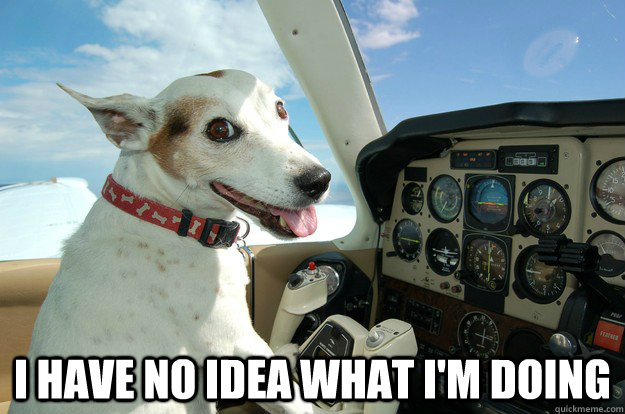

In [ ]:
# Google Colab cv2.imshow replacement displaying the image we just loaded
cv2_imshow(input_image)

### Image dimensions and format

In [ ]:
print("Image size ", input_image.size)
print("Image Shape - ", input_image.shape)

height, width, channels = input_image.shape # .shape returns a list 
print("Image height - ", height)
print("Image width - ", width)
print("Image channels - ", channels)

Image size  776250
Image Shape -  (414, 625, 3)
Image height -  414
Image width -  625
Image channels -  3


![](https://processing.org/static/5de945a82ce86f15ba9cda9179a38823/8ba2d/pixelarray.jpg)

## Pixels

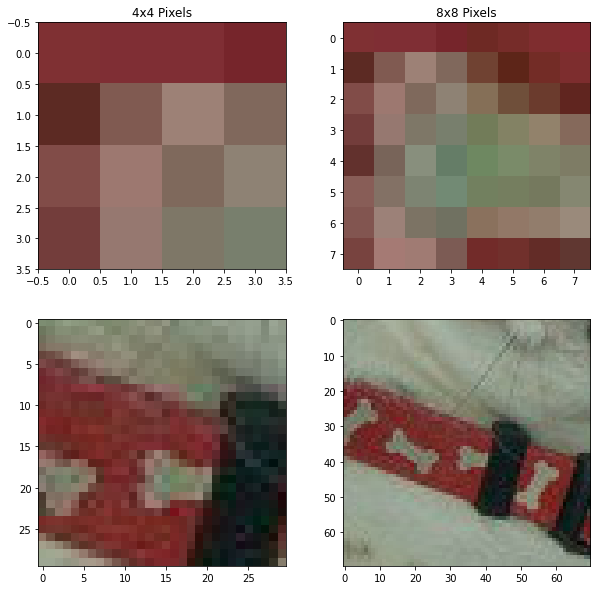

In [ ]:
fig, axarray = plt.subplots(2,2)
plt.rcParams['figure.figsize'] = [10, 10]

four_by_four = opencv_merged[215:219,172:176] # Crop 4x4 Pixels starting from 215,172
single_bone_section = opencv_merged[215:223,172:180] # Crop 8x8 Pixels starting from 215,172
collar_section = opencv_merged[200:230,160:190]
wider_section =  opencv_merged[180:250,140:210]

axarray[0,0].title.set_text('4x4 Pixels')
axarray[0,0].imshow(four_by_four)
axarray[0,1].title.set_text('8x8 Pixels')
axarray[0,1].imshow(single_bone_section)
axarray[1,0].imshow(collar_section)
axarray[1,1].imshow(wider_section)

### Splitting Channels
RGB - Red Green Blue

**in OpenCV an image is loaded as BGR**

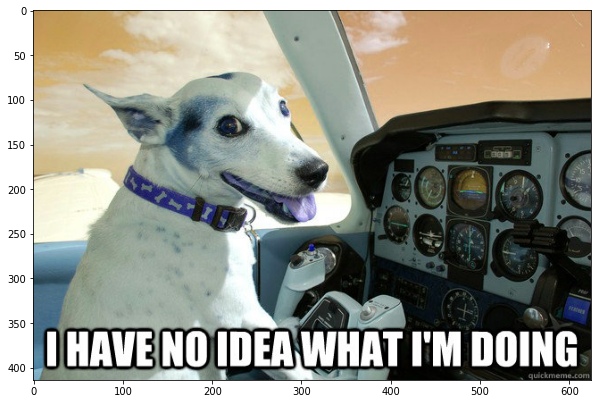

In [4]:
plt.imshow(input_image)

What this illustrates is something key about OpenCV: the default order of values in image read is not in RGB format, but in BGR format.

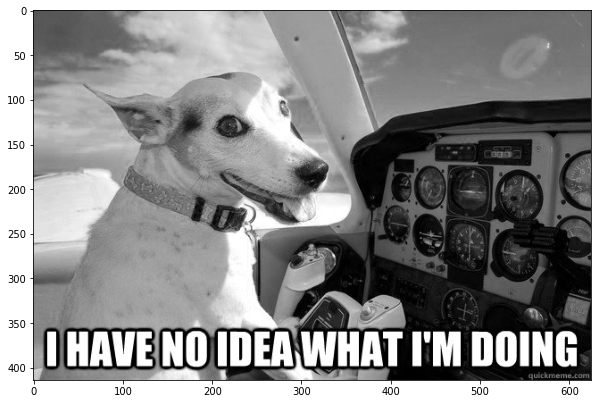

In [5]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')

The image shown illustrates the image r (Red) channel

In [6]:
# Do The same for a diffrent channel
# The example above displays r - red - see that the sky is kind of dark. try changing it to b

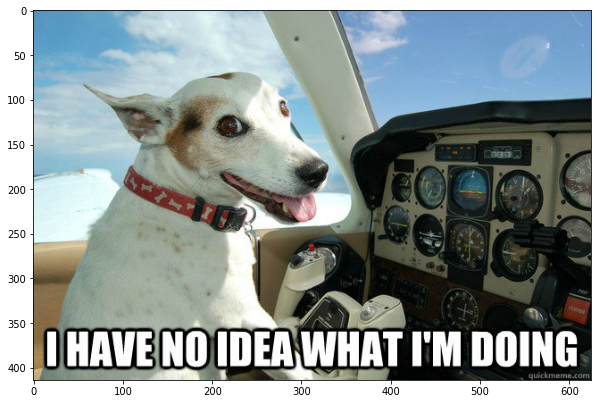

In [7]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)

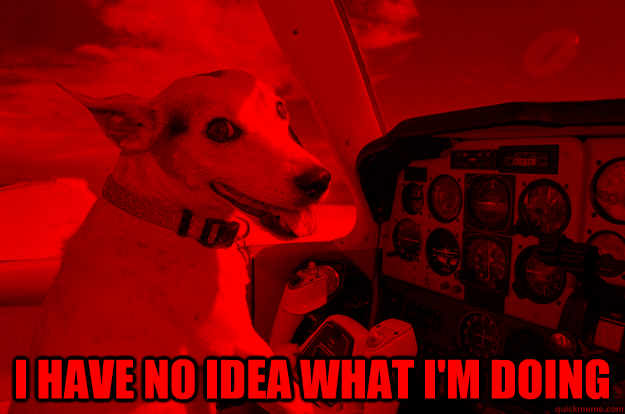

In [23]:
# create empty image with same shape as that of src image
red_img = np.zeros(input_image.shape)

#assign the red channel of src to empty image
red_img[:,:,2] = r

cv2_imshow(red_img)

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done.

In [ ]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

# If you want to see them all, rather than just a count uncomment the following line
print(COLORflags)

295
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COL

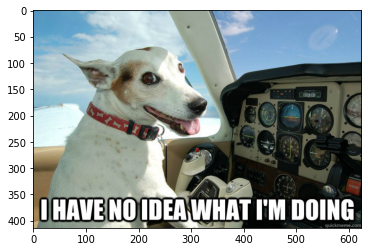

In [ ]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [ ]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [ ]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

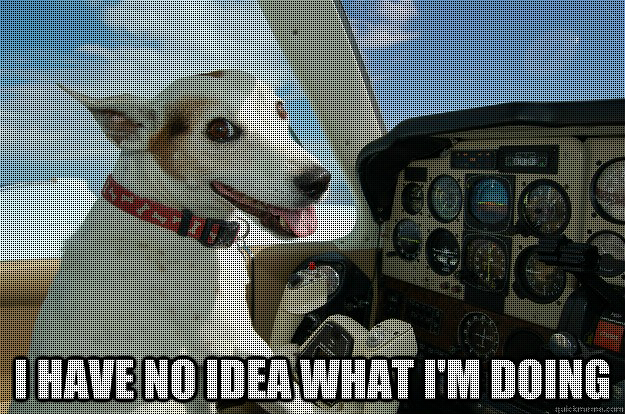

In [ ]:
temp_image = input_image.copy()
temp_image[1::2,1::2] = [0,0,0]
cv2_imshow(temp_image)

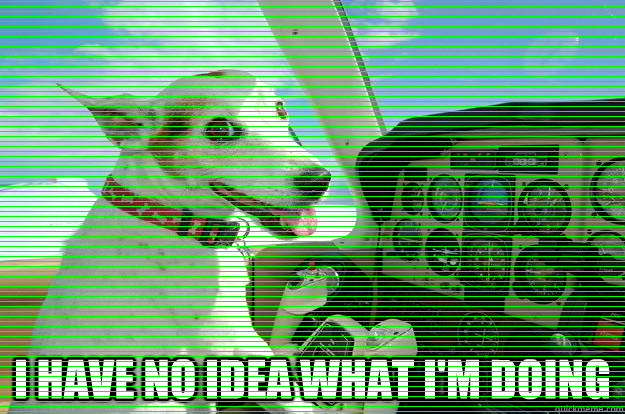

In [ ]:
temp_image = input_image.copy()
temp_image[1::5,0:width] = [0,255,0]
cv2_imshow(temp_image)

## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

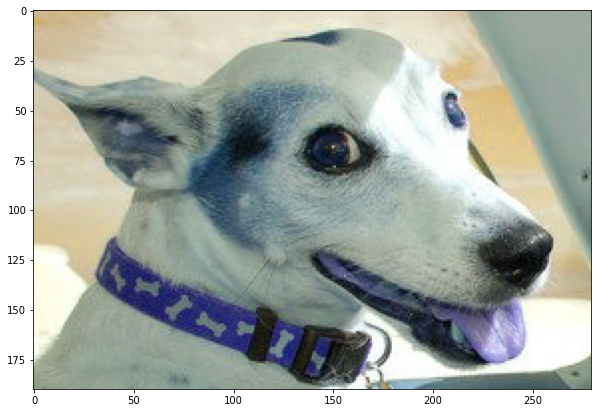

In [ ]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

190
280


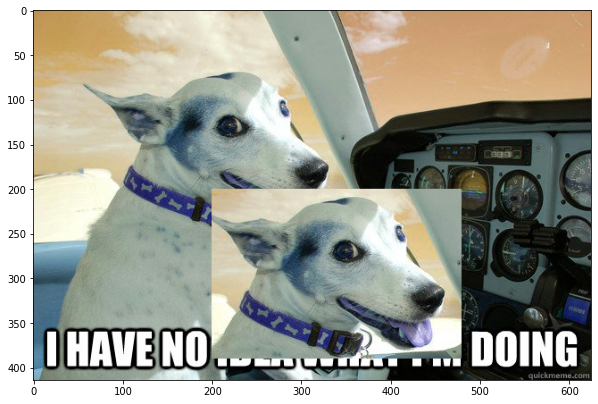

In [ ]:
fresh_image=cv2.imread('noidea.jpg') # it's either start with a fresh read of the image, 
                                  # or end up with dogfaces on dogfaces on dogfaces 
                                   # as you re-run parts of the notebook but not others... 
                            
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. The getting and setting of regions above uses slicing, though, and I'd like to finish this notebook with a little more detail on what is going on there. 

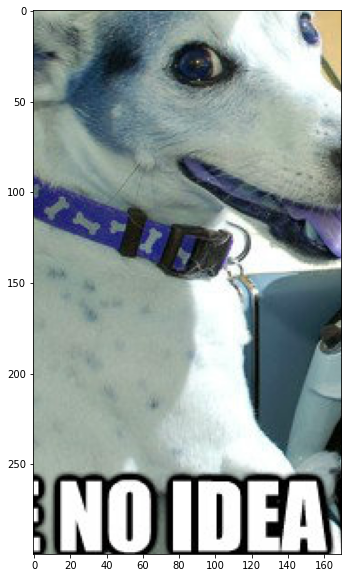

In [ ]:
freshim2 = cv2.imread("noidea.jpg")
crop = freshim2[100:400, 130:300] 
plt.imshow(crop)

The key thing to note here is that the slicing works like
```
[top_y:bottom_y, left_x:right_x]
```
This can also be thought of as 
```
[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
[y:y+height, x:x+width, channel]
```
where channel represents the colour you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else. Here's an example that converts to HSV then selects the S (Saturation) channel of the same crop above:

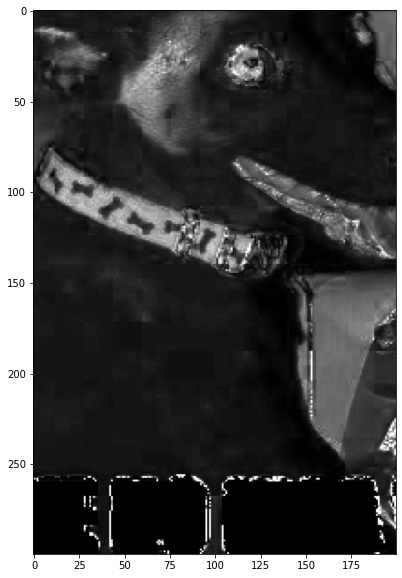

In [ ]:
hsvim=cv2.cvtColor(freshim2,cv2.COLOR_BGR2HSV)
bcrop =hsvim[100:400, 100:300, 1]
plt.imshow(bcrop, cmap="gray")

## Functions Covered

**OpenCV**[link text](https://)

image_data = cv2.imread(path) - reads *image data* from *file (path)*

dimensions = image_data.shape - property of image data that covers image dimension data (width, height, number of channels)

converted = cv2.cvtColor(image,code) - converts *image* color data according to image *code* (for example cv2.COLOR_BGR2RGB will convert BGR to RGB)

r,g,b = cv2.split(image_data) - split image color (and alpha channel if exists)

merged = cv2.merge([..channels..]) - merge *channels* to an image

---

**Functions used to display images**

cv2.imshow

cv2_imshow(image_data) - a version of cv2.imshow for google colab

plt.imshow(image_data) - matplotlib (```import matplotlib as plt```)

**Numpy**
zero_image = np.zeros(image_data.shape) - create an empty image using numpy




## Run the next two blocks to capture an image from your webcam
After running these blocks an image will be saved to **photo.jpg** and you'll be able to read and use it in your notebook. (the code for capturing an image from the webcam was taken from the code snippets offered by google colab - accessible on the left)

In [ ]:
#@title
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


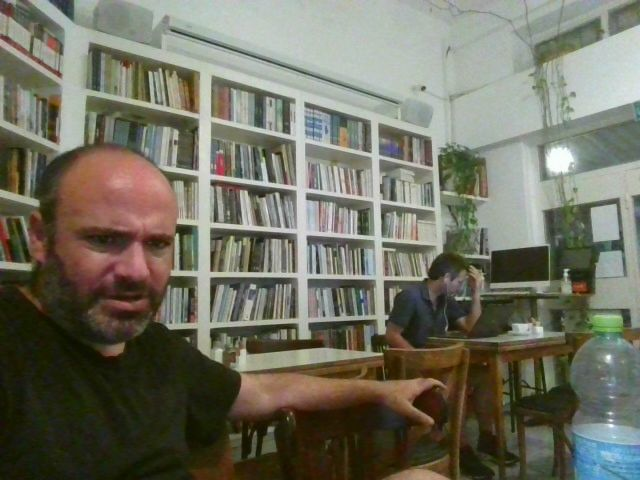

In [ ]:
#@title
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

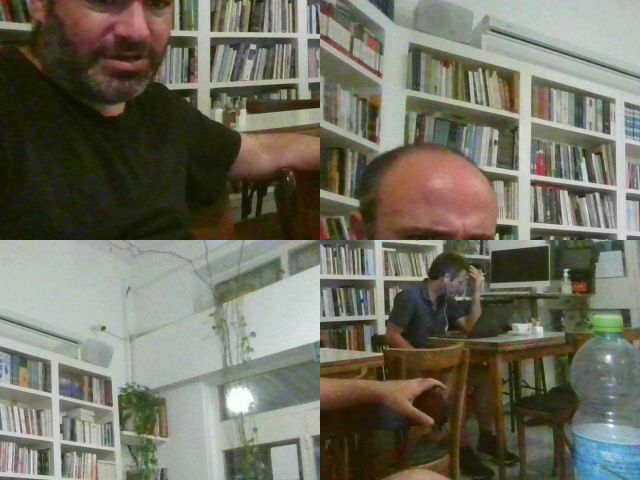

In [ ]:
capture = cv2.imread('photo.jpg')
copy = capture.copy()

height, width, channels = capture.shape

left_top = capture[0:height//2, 0:width//2]
right_top = capture[0:height//2, width//2:width]
left_bottom = capture[height//2:height, 0:width//2]
right_bottom = capture[height//2:height, width//2:width]

copy[0:height//2,0:width//2] = left_bottom
copy[0:height//2,width//2:width] = left_top
copy[height//2:height,0:width//2] = right_top
copy[height//2:height,width//2:width] = right_bottom


cv2_imshow(copy)

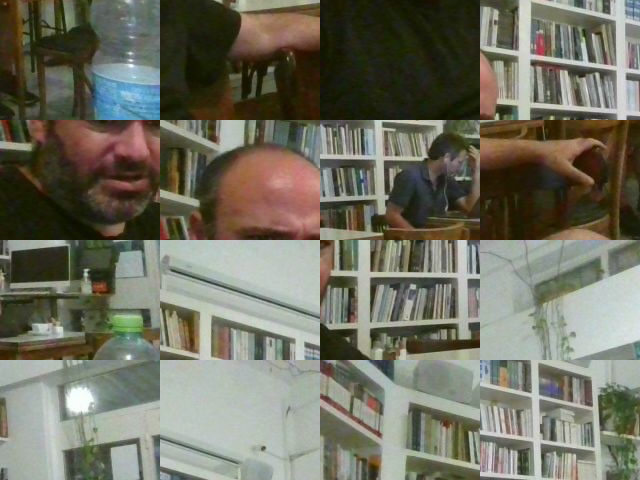

In [ ]:
import random

def break_and_mix(file, cut):
  capture = cv2.imread(file) #
  mosaic = capture.copy() # Buffer

  height, width, channels = capture.shape
  parts = []

  for sec_x in range(cut):
    for sec_y in range(cut):
      parts.append(capture[height//cut*sec_y:height//cut*(sec_y+1), width//cut*sec_x:width//cut*(sec_x+1)]) 

  random.shuffle(parts)

  for sec_x in range(cut):
    for sec_y in range(cut):
      mosaic[height//cut*sec_y:height//cut*(sec_y+1), width//cut*sec_x:width//cut*(sec_x+1)] = parts.pop()
  
  return mosaic

cv2_imshow(break_and_mix('photo.jpg',4))

## Assigment

Create a system that captures a frame from your webcam and preforms a basic modification

(play with color channels, format, crop a section ..)

**Accessing Camera locally - On your machine**

The code below waits till you click on 'y' - then saves the image locally for you to use
```
import cv2

cap = cv2.VideoCapture(0) # video capture source camera (Here webcam of laptop) 
ret,frame = cap.read() # return a single frame in variable `frame`

while(True):
    cv2.imshow('img1',frame) #display the captured image
    if cv2.waitKey(1) & 0xFF == ord('y'): #save on pressing 'y' 
        cv2.imwrite('images/c1.png',frame)
        cv2.destroyAllWindows()
        break

cap.release()
```

